## Tutorial 4. Create channels from a polyline shapefile

In this tutorial we will use the previously created Network object to create two main channels for the extracted basins and see the different profiles. 

To run this tutorial in Jupyter, make sure that the "data" folder is inside the same folder of the notebook with the tutorial data. 

### 1. Load a previously created Network object

To load a previously created Network object (saved as *.dat file), simply call the Network class with the path as unique attribute

In [3]:
from landspy import Network

# Load a previously saved Network object. 
net = Network("data/guadalfeo_net1600.dat")

### 2. Create a vectorial drainage network with continous channels

We will create a vector drainage network with continous channels, open it in QGIS and extract the main channels for the principal basins. 


In [4]:
# We created the network (vector format)
net.exportShp("data/network.shp", True)

Open the shapefile in QGIS and select the main channels for the main drainage basins. As "continuous channel" options was selected, it is easier to select the polylines corresponding to these channels.

Export these lines to a new shapefile, start editing and merge contiguous segments. The output shapefile must contain only two polylines, corresponding to the main channels selected. Create a field **id** and a **name** field if desired. Give ids and names to both channels. If you want to modify the channels (select manually main channels), enable snapping in QGIS to avoid multipart features. 

Save the polyline shapefile as **selected_rivers.shp** and place it in the **out** folder. In the data folder there is already a shapefile with the main rivers. 

To get channels objects from a polyline we can use the function `shp_to_channels()` from landspy. This function takes first and last vertex of the polyline and extracts the channel. 

>- `shp_to_channels(path, net, id_field="", name_field="")`
    - `path` (str) Path to the polyline shapefile
    - `net` (Network) Network instance
    - `id_field` (str) Field with channel ids
    - `name_field` (str) Field with channel names



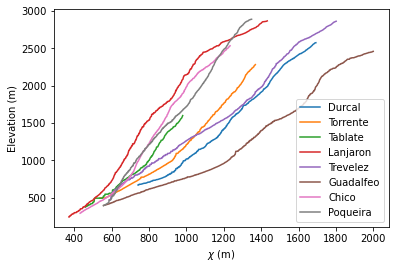

In [8]:
from landspy import shp_to_channels
import matplotlib.pyplot as plt

canales = shp_to_channels("data/selected_rivers.shp", net, "Id", "name")

# Plot both channels in a Chi profile
fig, ax = plt.subplots()
for canal in canales:
    zi = canal.getZ()
    chi = canal.getChi()
    ax.plot(chi, zi, label=canal.getName())

ax.set_xlabel("$\\chi$ (m)")
ax.set_ylabel("Elevation (m)")
ax.legend(loc="lower right")